In [1]:
# Download The Dataset from 
#https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria

In [82]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [53]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'cell_images/Train'
valid_path = 'cell_images/Test'


In [54]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [55]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [56]:
  # useful for getting number of output classes
folders = glob('Dataset/Train/*')

In [57]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [58]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [59]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [15]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [60]:
from tensorflow.keras.layers import MaxPooling2D

In [61]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 56, 56, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 28, 28, 64)       

In [62]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [63]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [64]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [65]:
training_set

In [66]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [51]:
test_set

In [69]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
13/13 [==============================] - 14s 1s/step - loss: 1.4969 - accuracy: 0.4952 - val_loss: 0.8388 - val_accuracy: 0.3209
Epoch 2/50
13/13 [==============================] - 14s 1s/step - loss: 0.6973 - accuracy: 0.5144 - val_loss: 0.6542 - val_accuracy: 0.6791
Epoch 3/50
13/13 [==============================] - 14s 1s/step - loss: 0.6602 - accuracy: 0.5793 - val_loss: 0.6790 - val_accuracy: 0.6269
Epoch 4/50
13/13 [==============================] - 15s 1s/step - loss: 0.6141 - accuracy: 0.6851 - val_loss: 0.7487 - val_accuracy: 0.3657
Epoch 5/50
13/13 [==============================] - 15s 1s/step - loss: 0.5637 - accuracy: 0.6851 - val_loss: 1.0757 - val_accuracy: 0.3507
Epoch 6/50
13/13 [==============================] - 15s 1s/step - loss: 0.5072 - accuracy: 0.7163 - val_loss: 0.9650 - val_accuracy: 0.3358
Epoch 7/50
13/13 [==============================] - 15s 1s/step - loss: 0.4568 - accuracy: 0.8029 - val_loss: 0.9477 - val_accuracy: 0.3582
Epoch 8/50
13/13 [==

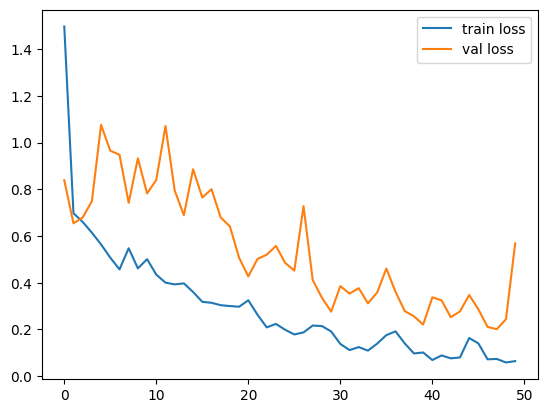

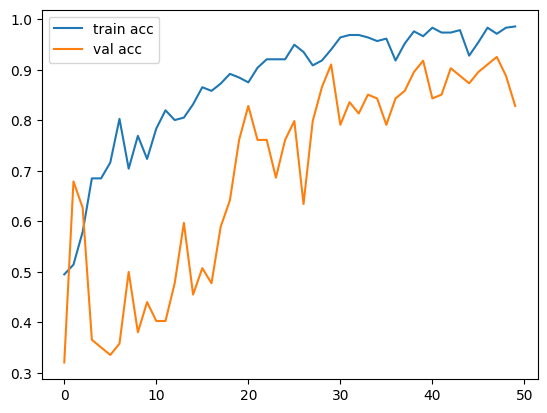

<Figure size 640x480 with 0 Axes>

In [70]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [71]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

C:\Users\Inaam-ul-Haq\anaconda3\envs\tensorflow\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [85]:
y_pred = model.predict(test_set)


5/5 [==============================] - 1s 111ms/step


In [86]:
y_pred

array([[9.80807126e-01, 1.91928390e-02],
       [5.02901450e-02, 9.49709892e-01],
       [5.24488762e-02, 9.47551191e-01],
       [9.96807098e-01, 3.19294306e-03],
       [1.31077422e-02, 9.86892283e-01],
       [8.60637844e-01, 1.39362082e-01],
       [9.98952031e-01, 1.04799238e-03],
       [9.99957085e-01, 4.28957865e-05],
       [9.99999046e-01, 9.27685107e-07],
       [9.99991059e-01, 8.91311811e-06],
       [4.82544722e-03, 9.95174587e-01],
       [9.98413324e-01, 1.58671208e-03],
       [8.11517239e-01, 1.88482821e-01],
       [8.44047725e-01, 1.55952305e-01],
       [9.45898965e-02, 9.05410051e-01],
       [9.37872753e-03, 9.90621328e-01],
       [1.00000000e+00, 1.51333723e-09],
       [1.16354942e-01, 8.83645058e-01],
       [9.99910712e-01, 8.92520984e-05],
       [9.99999523e-01, 5.29930958e-07],
       [1.47501091e-02, 9.85249937e-01],
       [9.99999285e-01, 7.18775141e-07],
       [1.54258925e-02, 9.84574139e-01],
       [9.97889459e-01, 2.11054925e-03],
       [9.999980

In [87]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [88]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [89]:
model=load_model('model_vgg19.h5')

In [90]:
img=image.load_img('Dataset/Test/Uninfected/2.png',target_size=(224,224))


In [91]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [92]:
x.shape

(224, 224, 3)

In [93]:
x=x/255

In [94]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [95]:
model.predict(img_data)

1/1 [==============================] - 0s 122ms/step


array([[0., 1.]], dtype=float32)

In [96]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 36ms/step


In [97]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
